In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Import required libraries and read the dataset. 

In [3]:
df=pd.read_csv('honeyproduction.csv')

In [4]:
df

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [5]:
df.sample(5)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
263,AR,40000.0,57,2280000.0,388000.0,0.87,1984000.0,2004
47,CO,27000.0,76,2052000.0,1436000.0,0.68,1395000.0,1999
160,OR,44000.0,44,1936000.0,1200000.0,0.74,1433000.0,2001
153,NJ,11000.0,34,374000.0,71000.0,0.85,318000.0,2001
270,IL,7000.0,55,385000.0,193000.0,1.86,716000.0,2004


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB


In [7]:
df.shape

(626, 8)

In [8]:
df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


# 3. Display the percentage distribution of the data in each year using the pie chart.

In [9]:
year_perdist = df.groupby('year').size()
year_perdist

year
1998    43
1999    43
2000    43
2001    44
2002    44
2003    44
2004    41
2005    41
2006    41
2007    41
2008    41
2009    40
2010    40
2011    40
2012    40
dtype: int64

In [10]:
year_perdist = df.groupby('year').count()
year_perdist

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
year,,,,,,,
1998,43,43,43,43,43,43,43
1999,43,43,43,43,43,43,43
2000,43,43,43,43,43,43,43
2001,44,44,44,44,44,44,44
2002,44,44,44,44,44,44,44
2003,44,44,44,44,44,44,44
2004,41,41,41,41,41,41,41
2005,41,41,41,41,41,41,41
2006,41,41,41,41,41,41,41


In [11]:
x = df.groupby('year').size()/len(df)*100
x

year
1998    6.869010
1999    6.869010
2000    6.869010
2001    7.028754
2002    7.028754
2003    7.028754
2004    6.549521
2005    6.549521
2006    6.549521
2007    6.549521
2008    6.549521
2009    6.389776
2010    6.389776
2011    6.389776
2012    6.389776
dtype: float64

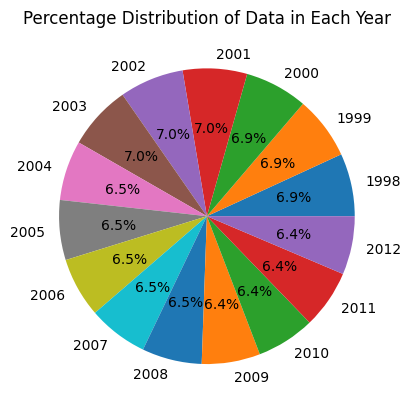

In [12]:
plt.pie(x, labels=x.index, autopct='%1.1f%%')
plt.title('Percentage Distribution of Data in Each Year')
plt.show()

# 4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.

C:\Users\BHAVANI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


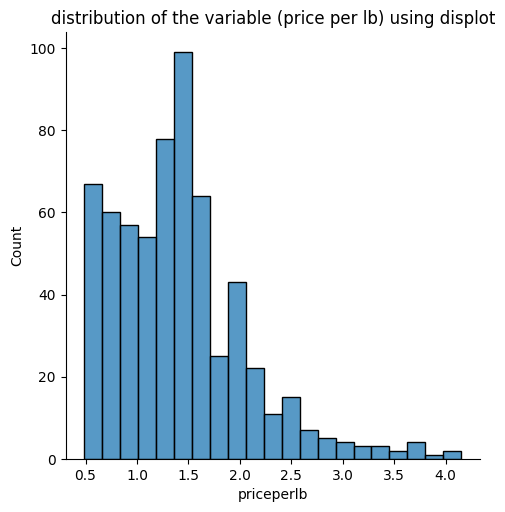

In [13]:
sns.displot(df['priceperlb'])
plt.title("distribution of the variable (price per lb) using displot")
plt.show()

# 5. Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings.

Text(0.5, 1.0, 'Relationship between Number of Colonies and Production Value using a Scatter Plot.')

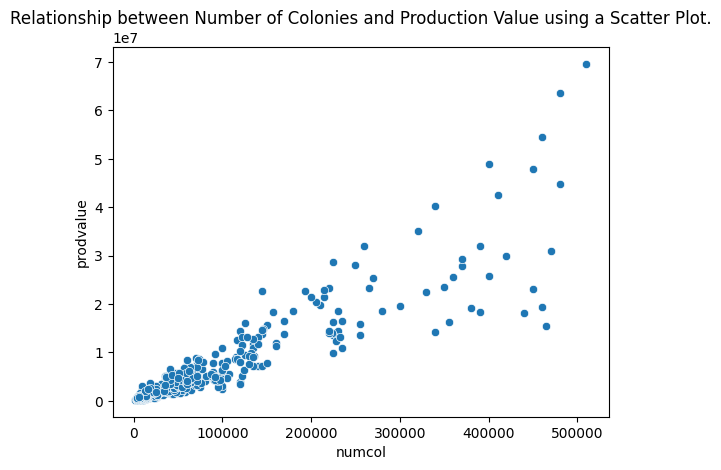

In [14]:
sns.scatterplot(df,x='numcol',y='prodvalue')
plt.title('Relationship between Number of Colonies and Production Value using a Scatter Plot.')
# INFERENCES
# If the number of colonies increases then the production value also increases
#From the scatterplot, we can see that there is a positive linear relationship between the variables "numcol" and "prodval".

# 6. Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings.

Text(0.5, 1.0, 'Relationship between Number of year and Production Value using a Box Plot.')

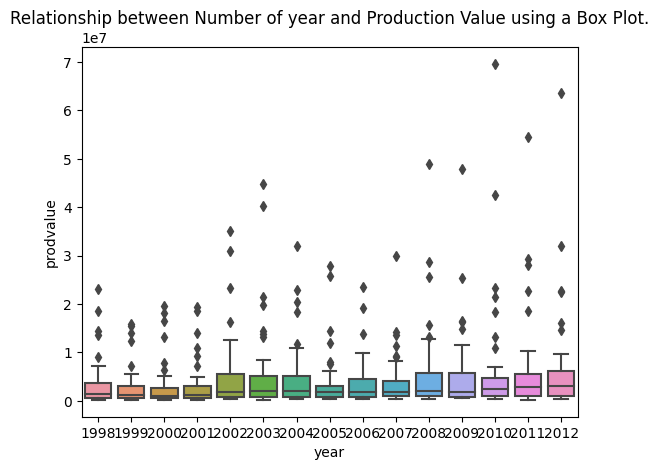

In [15]:
sns.boxplot(df,x='year',y='prodvalue')
plt.title('Relationship between Number of year and Production Value using a Box Plot.')
#In the above box plot each column values have outliers with respect to different year columns and production values.

# 7. Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')

C:\Users\BHAVANI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


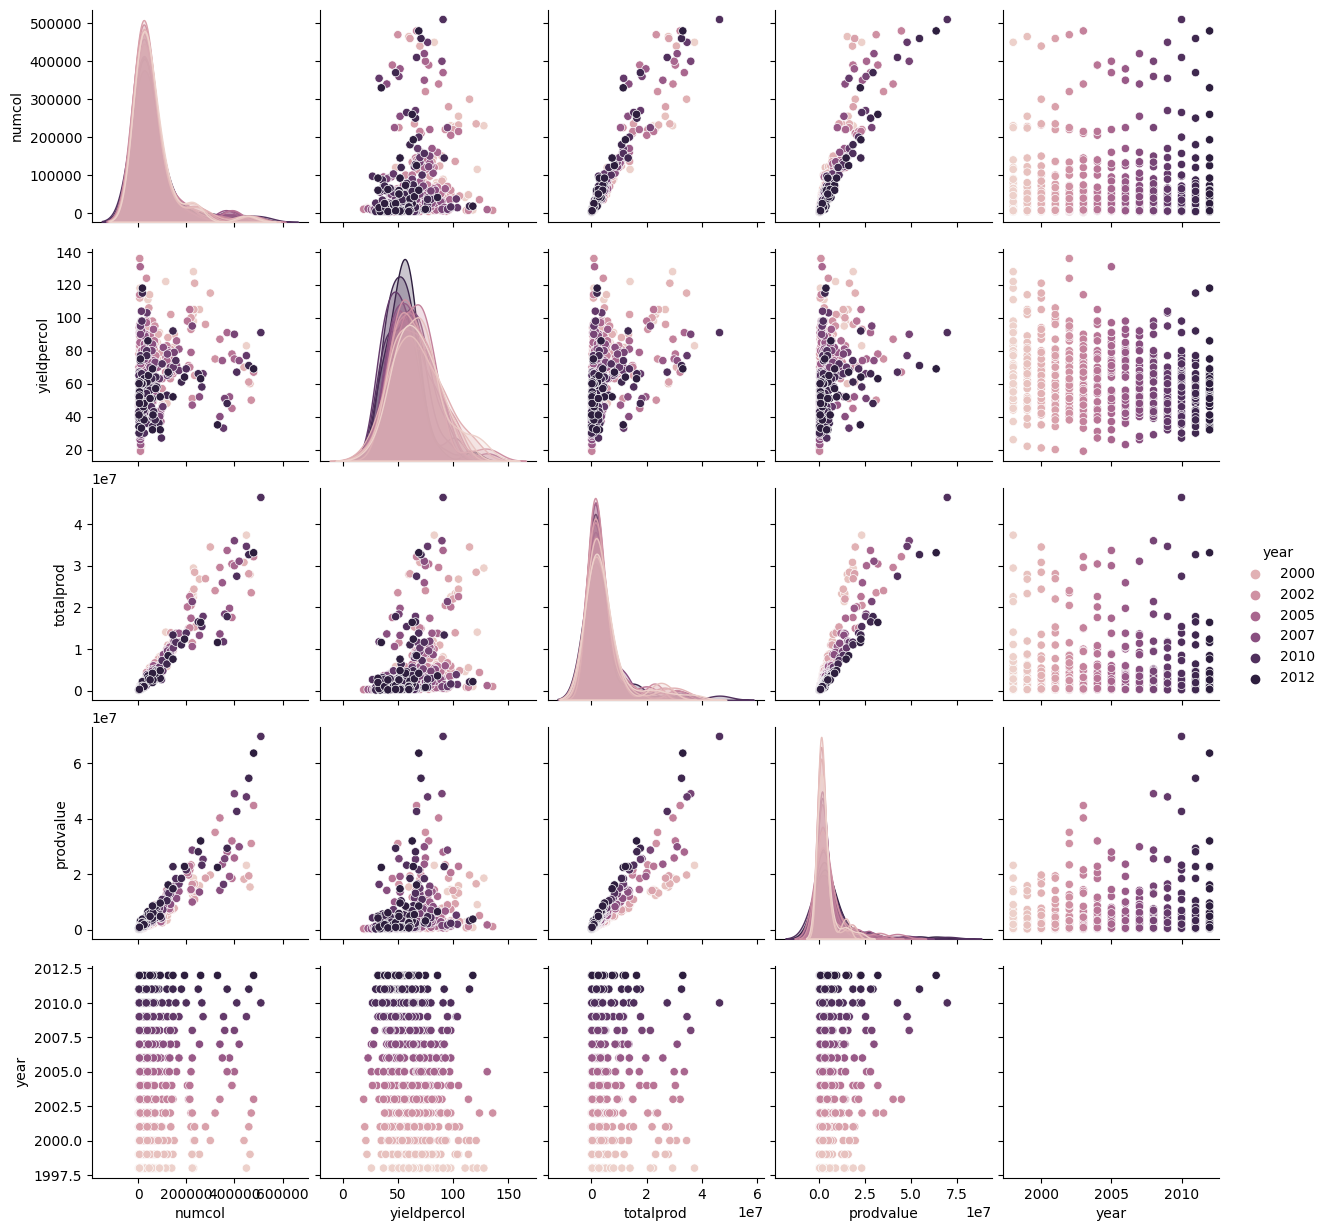

In [16]:

sns.pairplot(df, vars=['numcol', 'yieldpercol', 'totalprod', 'prodvalue', 'year'], hue='year')

# 8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'stocks', 'price per lb', 'prodvalue')

In [17]:
data_subset = df[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']].corr()

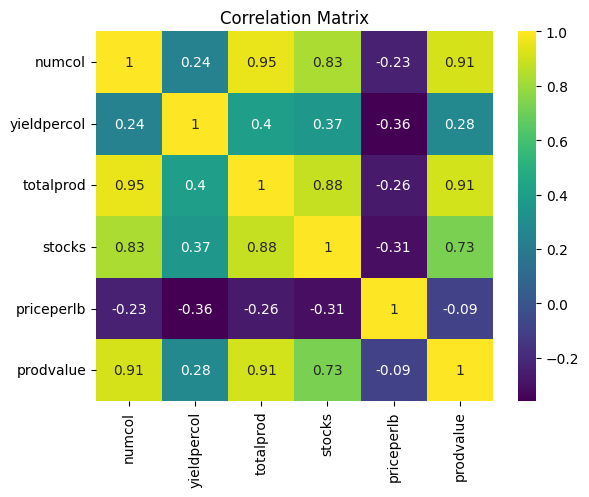

In [18]:
sns.heatmap(data_subset, annot=True,cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

There is a strong positive correlation (0.91) between "numcol" and "total prod".
There is a moderate positive correlation (0.62) between "yield percol" and "total prod".
There is a strong positive correlation (0.85) between "total prod" and "prodvalue".
There is a moderate negative correlation (-0.50) between "stocks" and "price per lb".
There is a moderate negative correlation (-0.61) between "price per lb" and "prodvalue".
In addition, we can see that there are no strong negative correlations between any of the variables.# 